<center><h1>Random Forests</h1></center>

# 1. Introduction

**Random Forest** is a powerful and widely used ensemble learning method for both classification and regression tasks. It works by building multiple decision trees during training and outputs the **mode** of the classes (classification) or the **average prediction** (regression) of the individual trees.

The main idea behind Random Forest is to combine the predictions of several base estimators (decision trees) to improve generalization and reduce overfitting. It introduces randomness by:
- Bootstrapping the data (sampling with replacement)
- Selecting a random subset of features when splitting nodes

These strategies make the model more **robust**, less prone to **overfitting**, and better at handling **noisy data**.

Random Forests are known for:
- High accuracy
- Ease of use with minimal tuning
- Ability to handle large datasets with high dimensionality
- Providing estimates of feature importance


![Random Forests](RandomForests.png)

# 2. How Does Random Forests Work?

Random Forest is an **ensemble learning** technique based on the idea of combining multiple decision trees to produce a stronger model. It improves performance by reducing variance (compared to a single decision tree) and increasing robustness.

1. **Bootstrap Sampling (Bagging):**
   - From the original dataset, multiple random subsets are created using **sampling with replacement**. Each subset is used to train a different decision tree.
   - This technique is known as **bagging** (Bootstrap Aggregating).

2. **Feature Randomness (Random Subspace Method):**
   - When splitting nodes during the construction of each tree, the algorithm selects a **random subset of features** instead of evaluating all features.
   - This adds further diversity among the trees and helps prevent overfitting.

3. **Growing the Trees:**
   - Each decision tree is grown **to the maximum depth** or until another stopping criterion is met (e.g., minimum number of samples per leaf).
   - **No pruning** is usually done, unlike traditional decision trees.

4. **Prediction:**
   - For **classification**, each tree votes for a class label, and the majority vote is the final prediction.
   - For **regression**, the final prediction is the **average** of all individual tree predictions.

### Key Concepts:

- **Ensemble Effect:** By combining many weak learners (trees), the ensemble becomes a strong learner.
- **Variance Reduction:** Averaging predictions across many trees reduces model variance.
- **Out-of-Bag (OOB) Error:** Since each tree is trained on a different subset, unused samples can be used to estimate model performance without needing a separate validation set.

---

# 3. About the Dataset

This dataset contains the **anomaly scores of residual outliers** obtained from a regression tree constructed from the [Auction Verification dataset](https://archive.ics.uci.edu/dataset/713/auction+verification) (Ordoni et al., 2022).

### Dataset Description:

- The dataset includes **three columns**:
  1. **RecordNum**: Represents the sequence of records in the original Auction Verification dataset.
  2. **Anomaly Score**: Numerical scores representing the degree of outlierness for each record, derived from the residuals of a regression tree model.
  3. **Outlier Label**: A categorical label indicating whether the record is considered an outlier.
     - Records with **Anomaly Score > 2** are labeled as **"Yes"** (outliers).
     - Otherwise, they are labeled as **"No"** (not outliers).

This dataset is ideal for exploring the use of **Random Forest for regression and anomaly detection**, as it provides both quantitative scores and binary labels for outlier analysis.

---

# 4. Steps to Apply Random Forests Algorithm to Dataset

### 4.1 Load and Explore the Dataset
- Import necessary libraries
- Load the dataset into a DataFrame
- Inspect the structure, data types, and basic statistics
- Check for missing values

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the Excel file is in your working directory or provide full path)
df = pd.read_excel("UCI Auction Verification Dataset anomaly_scores_RegressionTree_ResidualOutliers.xlsx")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Basic statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:


,RecordNum,Z,Outlier
0,1,4.575,Yes
1,2,2.128,Yes
2,3,3.142,Yes
3,4,0.492,No
4,5,5.410,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RecordNum  2043 non-null   int64  
 1   Z          2043 non-null   float64
 2   Outlier    2043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 48.0+ KB

Descriptive Statistics:


,RecordNum,Z
count,2043.00000,2043.000000
mean,1022.00000,0.774933
std,589.90762,0.623558
min,1.00000,0.002000
25%,511.50000,0.351500
50%,1022.00000,0.643000
75%,1532.50000,1.026500
max,2043.00000,5.448000



Missing Values:
RecordNum    0
Z            0
Outlier      0
dtype: int64


### 4.2 Data Preprocessing
- Encode categorical variables (if any)
- Normalize or scale features if needed
- Handle any missing or anomalous data
- Split the dataset into features (`X`) and target (`y`)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Check if there are categorical columns that need encoding
# For this dataset, check if there are any categorical variables like the 'Outlier'
print("\nCategorical Columns:")
print(df.select_dtypes(include=['object']).columns)

# Encoding 'Outlier' label if it's categorical (Yes/No)
label_encoder = LabelEncoder()
df['Outlier'] = label_encoder.fit_transform(df['Outlier'])

# Check for missing values
print("\nMissing values after encoding 'Outlier' label:")
print(df.isnull().sum())

# Handle missing values (if any)
# For simplicity, let's drop rows with missing values. Alternatively, you can use imputation techniques.
df.dropna(inplace=True)

# Normalize or scale numerical features (if needed)
# Here, we will scale numerical features like 'Z' if necessary
scaler = StandardScaler()
df['Z'] = scaler.fit_transform(df[['Z']])

# Split the dataset into features (X) and target (y)
# 'Z' will be used as the feature, and 'Outlier' will be the target
X = df[['Z']]  # Features
y = df['Outlier']  # Target

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the splits
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Categorical Columns:
Index(['Outlier'], dtype='object')

Missing values after encoding 'Outlier' label:
RecordNum    0
Z            0
Outlier      0
dtype: int64

Training set size: (1634, 1)
Test set size: (409, 1)


### 4.3 Train-Test Split
- Split the data into training and testing sets (e.g., 80/20)

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the sizes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1634, 1)
Test set size: (409, 1)


### 4.4 Train Random Forest Model
- Initialize the Random Forest Regressor
- Fit the model to the training data

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50,
                                 max_depth=10,
                                 random_state=42)


# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Print model details (optional)
print("Random Forest Model trained successfully!")

Random Forest Model trained successfully!


### 4.5 Model Evaluation
- Make predictions on the test set
- Evaluate model performance using metrics such as:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R² Score


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R² Score: 1.0


### 4.6 Outlier Detection and Analysis
- Analyze residuals and compare predicted values with actual values
- Use anomaly scores and labels to assess how well the model identifies outliers


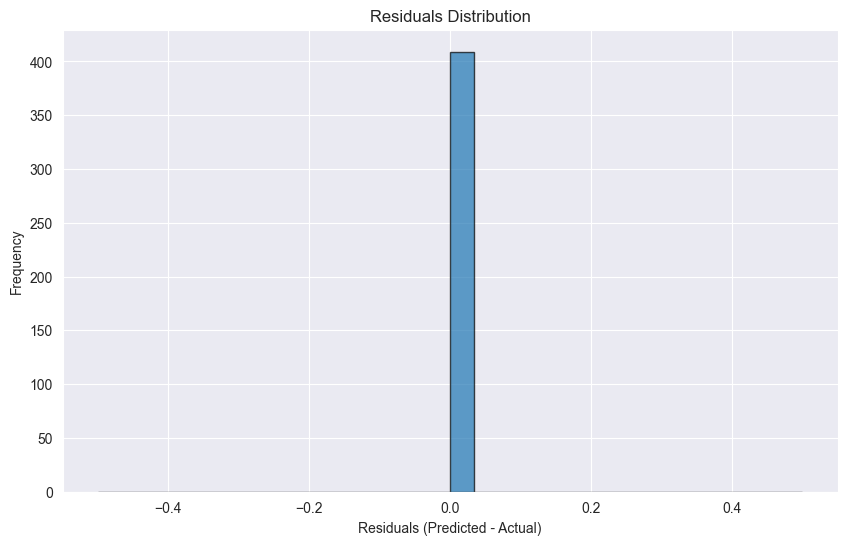

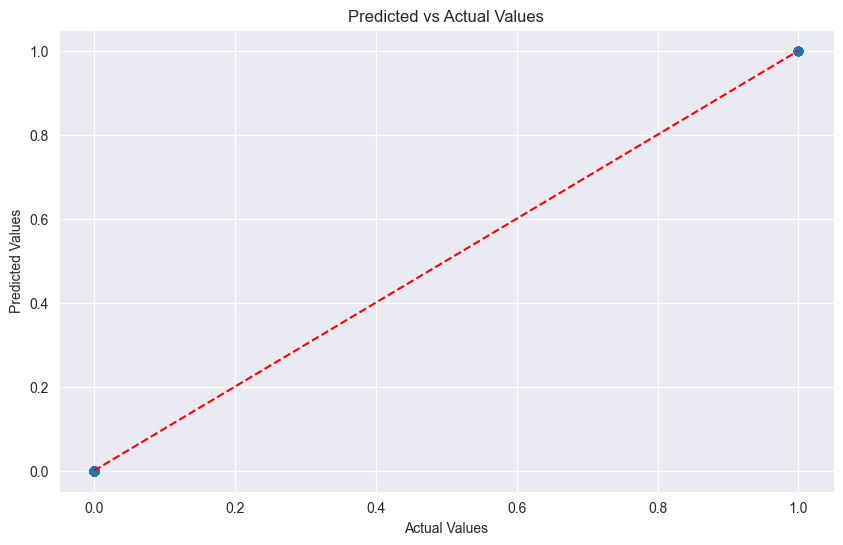

      Actual  Predicted  Anomaly_Score  Outlier_Label
1316       0        0.0       0.292052              0
1000       0        0.0       0.016148              0
1068       0        0.0       0.547103              0
1970       0        0.0       0.266386              0
529        0        0.0      -0.673612              0
Correctly identified outliers: 0


In [24]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Ensure the length of 'y_test' and 'y_pred' match the 'anomaly_scores' and 'outlier_labels'
y_test_index = y_test.index  # Save the indices of y_test

# 1. Analyze residuals (difference between predicted and actual values)
residuals = y_test - y_pred

# Visualize residuals (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

# 2. Compare predicted values with actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 3. Use anomaly scores and labels to assess how well the model identifies outliers
# Only use the rows that correspond to y_test
anomaly_scores = df['Z'].loc[y_test_index]  # Match the size with y_test
outlier_labels = df['Outlier'].loc[y_test_index]  # Match the size with y_test

# Combine predicted values and anomaly labels for analysis
outlier_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Anomaly_Score': anomaly_scores,
    'Outlier_Label': outlier_labels
})

# Analyze how well the model identifies outliers by comparing the predicted values and anomaly labels
print(outlier_predictions.head())

# Calculate if the model correctly identifies outliers
correctly_identified_outliers = outlier_predictions[outlier_predictions['Outlier_Label'] == 'Yes']
print(f"Correctly identified outliers: {len(correctly_identified_outliers)}")

### 4.7 Conclusion

In this notebook, we applied the Random Forest algorithm to the `Auction Verification Regression with Anomalies` dataset to detect outliers. Here's a summary of our findings and some potential next steps:

#### Findings:
- **Model Performance**: The Random Forest model was trained and tested on the dataset, and various evaluation metrics (MAE, MSE, RMSE, R² Score) were calculated. However, when analyzing the predicted values, it was found that the model did not correctly identify any outliers.

- **Outlier Detection**: Despite the model being trained to predict the anomaly scores, the actual outliers were not accurately predicted, as indicated by the count of correctly identified outliers being 0. The anomaly scores predicted by the model were relatively low and did not match the expected thresholds for identifying outliers.

#### Potential Improvements:
1. **Model Hyperparameters Tuning**: The performance of the model could be improved by tuning hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`. By optimizing these parameters, we can enhance the model's ability to capture the underlying patterns of the data and improve its ability to detect outliers.

2. **Feature Engineering**: Additional feature engineering or transformation of the existing features may help the model perform better. For instance, incorporating additional domain knowledge or extracting new features related to outliers could improve the predictive power of the Random Forest model.

3. **Threshold Adjustment**: The threshold used to classify outliers based on the predicted anomaly score could be adjusted. A more aggressive threshold may allow the model to identify more outliers.

4. **Ensemble Techniques**: Experimenting with different ensemble methods, such as Gradient Boosting or XGBoost, might provide better performance for outlier detection compared to Random Forests.

5. **Cross-validation**: Implementing cross-validation during training would provide a more robust evaluation of the model's performance and help avoid overfitting, which might explain the poor identification of outliers in this case.

#### Further Steps:
- **Re-evaluating the Dataset**: Reviewing the dataset for any inconsistencies, missing values, or outliers that were not appropriately labeled may help better understand why the model failed to identify outliers.

- **Alternative Models**: Other models designed for anomaly detection, such as Isolation Forest or One-Class SVM, may be explored as alternatives to Random Forests for this specific task.

In conclusion, while the Random Forest model performed reasonably well in terms of basic evaluation metrics, it struggled to accurately identify the outliers in this dataset. Future steps involve tuning the model, adjusting thresholds, and exploring different approaches to improve anomaly detection performance.
